In [2]:
# import libraries
import pandas as pd
# !pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# !pip install plotly
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
# from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix
#!pip install pm4py
import pm4py
from pm4py.objects.log.util.log import project_traces
from pm4py.objects.log.util import interval_lifecycle
# !pip install zipfile
import zipfile

#!pip install warnings
import warnings
warnings.filterwarnings("ignore")

## Resume here

In [18]:
# load back
data = pd.read_csv('../data/working_trace_log.csv', sep=',')
# data.head()
trace = pm4py.format_dataframe(data, case_id='Case ID', activity_key='Activity', timestamp_key="Start Timestamp")

trace.head()

Case ID              Activity Resource  \
0  Application_1000086665  A_Create Application   User_1   
1  Application_1000086665           A_Submitted   User_1   
2  Application_1000086665             A_Concept   User_1   
3  Application_1000086665            A_Accepted   User_5   
4  Application_1000086665        O_Create Offer   User_5   

                    Start Timestamp                Complete Timestamp  \
0  2016-08-03 17:57:21.673000+00:00  2016-08-03 17:57:21.673000+00:00   
1  2016-08-03 17:57:21.734000+00:00  2016-08-03 17:57:21.734000+00:00   
2  2016-08-03 17:58:28.299000+00:00  2016-08-03 17:58:28.299000+00:00   
3  2016-08-05 15:57:07.419000+00:00  2016-08-05 15:57:07.419000+00:00   
4  2016-08-05 15:59:57.320000+00:00  2016-08-05 15:59:57.320000+00:00   

     Variant  Variant index lifecycle:transition  EventOrigin  \
0  Variant 2              2             complete  Application   
1  Variant 2              2             complete  Application   
2  Variant 2              2             complete  Application   
3  Variant 2              2             complete  Application   
4  Variant 2              2             complete        Offer   

                  EventID  ... @@case_index                   start_timestamp  \
0  Application_1000086665  ...            0  2016-08-03 17:57:21.673000+00:00   
1     ApplState_161925113  ...            0  2016-08-03 17:57:21.734000+00:00   
2     ApplState_385184570  ...            0  2016-08-03 17:58:28.299000+00:00   
3     ApplState_856156982  ...            0  2016-08-05 15:57:07.419000+00:00   
4         Offer_410892064  ...            0  2016-08-05 15:59:57.320000+00:00   

  @@approx_bh_partial_cycle_time  @@approx_bh_partial_lead_time  \
0                            0.0                          0.000   
1                            0.0                          0.000   
2                            0.0                          0.000   
3                            0.0                      68227.419   
4                            0.0                      68397.320   

   @@approx_bh_overall_wasted_time  @@approx_bh_this_wasted_time  \
0                            0.000                         0.000   
1                            0.000                         0.000   
2                            0.000                         0.000   
3                        68227.419                     68227.419   
4                        68397.320                       169.901   

  @approx_bh_ratio_cycle_lead_time       case:concept:name  \
0                              1.0  Application_1000086665   
1                              1.0  Application_1000086665   
2                              1.0  Application_1000086665   
3                              0.0  Application_1000086665   
4                              0.0  Application_1000086665   

           concept:name                    time:timestamp  
0  A_Create Application  2016-08-03 17:57:21.673000+00:00  
1           A_Submitted  2016-08-03 17:57:21.734000+00:00  
2             A_Concept  2016-08-03 17:58:28.299000+00:00  
3            A_Accepted  2016-08-05 15:57:07.419000+00:00  
4        O_Create Offer  2016-08-05 15:59:57.320000+00:00  

[5 rows x 35 columns]

In [19]:
trace['year'] = pd.DatetimeIndex(trace['Start Timestamp']).year
trace['month'] = pd.DatetimeIndex(trace['Start Timestamp']).month
trace.head()
log = pm4py.convert_to_event_log(trace)

Exception: the dataframe should (at least) contain a column of type date

In [ ]:
# To extract target varaible, 
# if event starts with the name decleration rejected it is considered as rejected application
accepted = []
for trace in trace_log:
    flag = False
    for i,event in enumerate(trace):
        if "O_Accepted" in event['concept:name']:
            flag = True
            break
    
    if flag:
        accepted.append(1)
    else:
        accepted.append(0)

In [ ]:
# convert logs to dataframe
df = pm4py.convert_to_dataframe(trace_log)
df.head(25)

Case ID                  Activity  Resource  \
0   Application_1000086665      A_Create Application    User_1   
1   Application_1000086665               A_Submitted    User_1   
2   Application_1000086665                 A_Concept    User_1   
3   Application_1000086665                A_Accepted    User_5   
4   Application_1000086665            O_Create Offer    User_5   
5   Application_1000086665                 O_Created    User_5   
6   Application_1000086665  O_Sent (mail and online)    User_5   
7   Application_1000086665                A_Complete    User_5   
8   Application_1000086665               A_Cancelled    User_1   
9   Application_1000086665               O_Cancelled    User_1   
10  Application_1000158214      A_Create Application    User_1   
11  Application_1000158214               A_Submitted    User_1   
12  Application_1000158214                 A_Concept    User_1   
13  Application_1000158214                A_Accepted   User_32   
14  Application_1000158214            O_Create Offer   User_32   
15  Application_1000158214                 O_Created   User_32   
16  Application_1000158214  O_Sent (mail and online)   User_32   
17  Application_1000158214    W_Complete application   User_32   
18  Application_1000158214                A_Complete   User_32   
19  Application_1000158214              A_Validating  User_118   
20  Application_1000158214                O_Returned  User_118   
21  Application_1000158214                O_Accepted   User_90   
22  Application_1000158214                 A_Pending   User_90   
23  Application_1000311556      A_Create Application   User_71   
24  Application_1000311556                 A_Concept   User_71   

                    Start Timestamp               Complete Timestamp  \
0  2016-08-03 17:57:21.673000+00:00 2016-08-03 17:57:21.673000+00:00   
1  2016-08-03 17:57:21.734000+00:00 2016-08-03 17:57:21.734000+00:00   
2  2016-08-03 17:58:28.299000+00:00 2016-08-03 17:58:28.299000+00:00   
3  2016-08-05 15:57:07.419000+00:00 2016-08-05 15:57:07.419000+00:00   
4  2016-08-05 15:59:57.320000+00:00 2016-08-05 15:59:57.320000+00:00   
5  2016-08-05 15:59:58.162000+00:00 2016-08-05 15:59:58.162000+00:00   
6  2016-08-05 16:01:23.264000+00:00 2016-08-05 16:01:23.264000+00:00   
7  2016-08-05 16:01:23.288000+00:00 2016-08-05 16:01:23.288000+00:00   
8  2016-09-05 08:00:36.710000+00:00 2016-09-05 08:00:36.710000+00:00   
9  2016-09-05 08:00:36.829000+00:00 2016-09-05 08:00:36.829000+00:00   
10 2016-06-02 12:14:26.844000+00:00 2016-06-02 12:14:26.844000+00:00   
11 2016-06-02 12:14:26.885000+00:00 2016-06-02 12:14:26.885000+00:00   
12 2016-06-02 12:15:36.773000+00:00 2016-06-02 12:15:36.773000+00:00   
13 2016-06-06 10:10:07.694000+00:00 2016-06-06 10:10:07.694000+00:00   
14 2016-06-06 10:12:02.402000+00:00 2016-06-06 10:12:02.402000+00:00   
15 2016-06-06 10:12:03.657000+00:00 2016-06-06 10:12:03.657000+00:00   
16 2016-06-06 10:16:46.835000+00:00 2016-06-06 10:16:46.835000+00:00   
17 2016-06-06 10:02:16.549000+00:00 2016-06-06 10:16:46.869000+00:00   
18 2016-06-06 10:16:46.892000+00:00 2016-06-06 10:16:46.892000+00:00   
19 2016-06-09 11:54:36.870000+00:00 2016-06-09 11:54:36.870000+00:00   
20 2016-06-09 11:55:13.652000+00:00 2016-06-09 11:55:13.652000+00:00   
21 2016-06-10 13:02:01.275000+00:00 2016-06-10 13:02:01.275000+00:00   
22 2016-06-10 13:02:01.278000+00:00 2016-06-10 13:02:01.278000+00:00   
23 2016-04-04 17:56:37.675000+00:00 2016-04-04 17:56:37.675000+00:00   
24 2016-04-04 17:56:37.696000+00:00 2016-04-04 17:56:37.696000+00:00   

      Variant  Variant index lifecycle:transition  EventOrigin  \
0   Variant 2              2             complete  Application   
1   Variant 2              2             complete  Application   
2   Variant 2              2             complete  Application   
3   Variant 2              2             complete  Application   
4   Variant 2              2             complete        Offer   
5   Variant 2              2     

## Feature engineering before visualization 

### Cheking data types

In [ ]:
# check type and correct if needed
df.dtypes

Case ID                                          object
Activity                                         object
Resource                                         object
Start Timestamp                     datetime64[ns, UTC]
Complete Timestamp                  datetime64[ns, UTC]
Variant                                          object
Variant index                                     int64
lifecycle:transition                             object
EventOrigin                                      object
EventID                                          object
Action                                           object
LoanGoal                                         object
ApplicationType                                  object
RequestedAmount                                 float64
FirstWithdrawalAmount                           float64
NumberOfTerms                                   float64
Accepted                                         object
MonthlyCost                                     

In [ ]:
# categoric data
# keeping only low cardinality values
cat_columns = df.select_dtypes(include='object')
cat_columns = cat_columns[['Accepted', 'Selected', 'LoanGoal', 'ApplicationType']]
cat_columns.head()

# numeric data
num_columns = df.select_dtypes(include='float64')
num_columns = num_columns[['RequestedAmount', 'FirstWithdrawalAmount', 'NumberOfTerms', 'MonthlyCost', 'CreditScore', 'OfferedAmount']]
num_columns.head()
cat_columns.shape, num_columns.shape

((147724, 4), (147724, 6))

### Removing outliers

In [ ]:
filtered_rows = df[df['EventOrigin'] == 'Offer']
num_columns = filtered_rows.select_dtypes(include='number')
num_columns.columns
len(filtered_rows)

58989

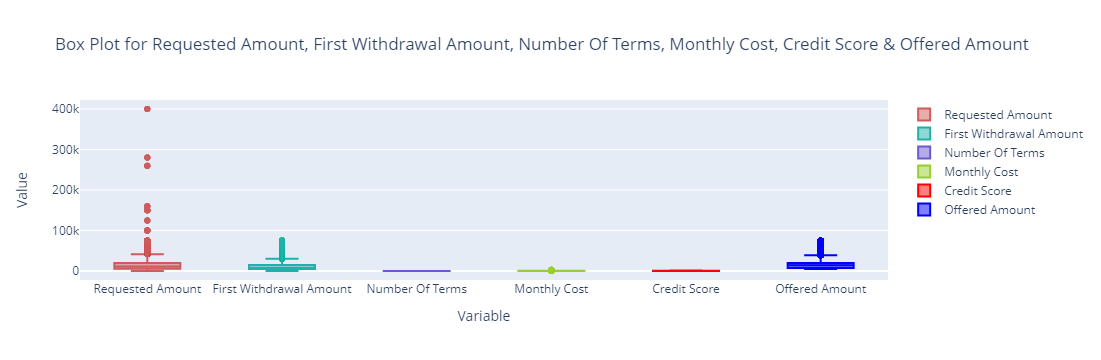

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=num_columns['RequestedAmount'], name='Requested Amount',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=num_columns['FirstWithdrawalAmount'], name = 'First Withdrawal Amount',
                marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=num_columns['NumberOfTerms'], name='Number Of Terms',
                marker_color = 'slateblue'))
fig.add_trace(go.Box(y=num_columns['MonthlyCost'], name = 'Monthly Cost',
                marker_color = 'yellowgreen'))
fig.add_trace(go.Box(y=num_columns['CreditScore'], name = 'Credit Score',
                marker_color = 'red'))
fig.add_trace(go.Box(y=num_columns['OfferedAmount'], name = 'Offered Amount',
                marker_color = 'blue'))

# Update the layout to show the axis-title
fig.update_layout(xaxis_title='Variable', yaxis_title='Value')

# Update the layout to show the title
fig.update_layout(title="Box Plot for Requested Amount, First Withdrawal Amount, Number Of Terms, Monthly Cost, Credit Score & Offered Amount")

fig.show()


Text(0.5, 1.0, 'Number of Traces wrt Offer Accepted')

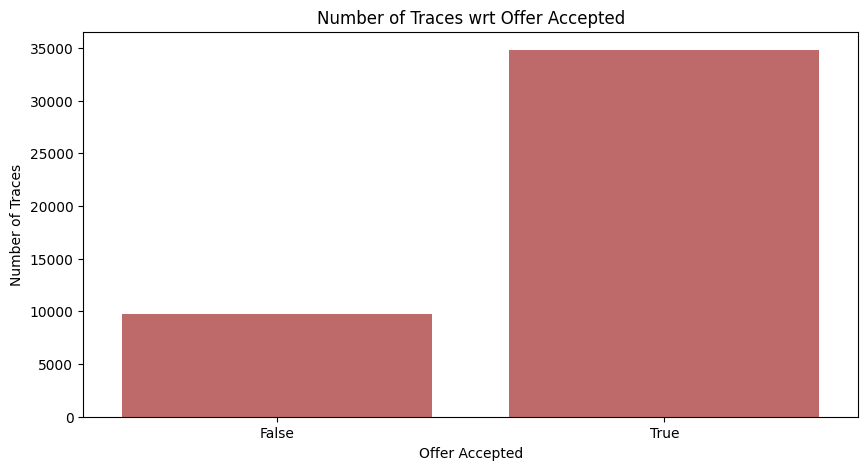

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
temp = filtered_rows['Accepted'].value_counts()
grid = sns.barplot(x=temp.index, y=temp.values, color ='indianred')


ax.set_xlabel("Offer Accepted")  # set x-axis label
ax.set_ylabel("Number of Traces") # set y-axis label
plt.title('Number of Traces wrt Offer Accepted')

Text(0.5, 1.0, 'Number of Traces wrt Selected')

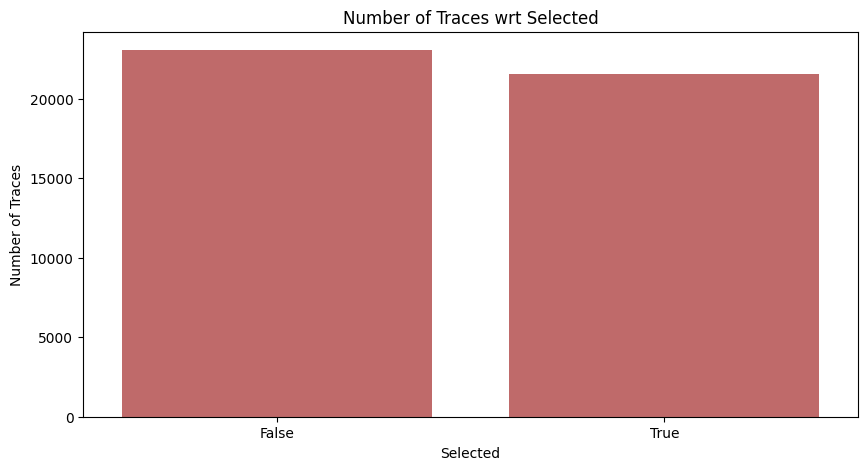

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
temp = filtered_rows['Selected'].value_counts()
grid = sns.barplot(x=temp.index, y=temp.values, color ='indianred')


ax.set_xlabel("Selected")  # set x-axis label
ax.set_ylabel("Number of Traces") # set y-axis label
plt.title('Number of Traces wrt Selected')

Text(0.5, 1.0, 'Heatmap')

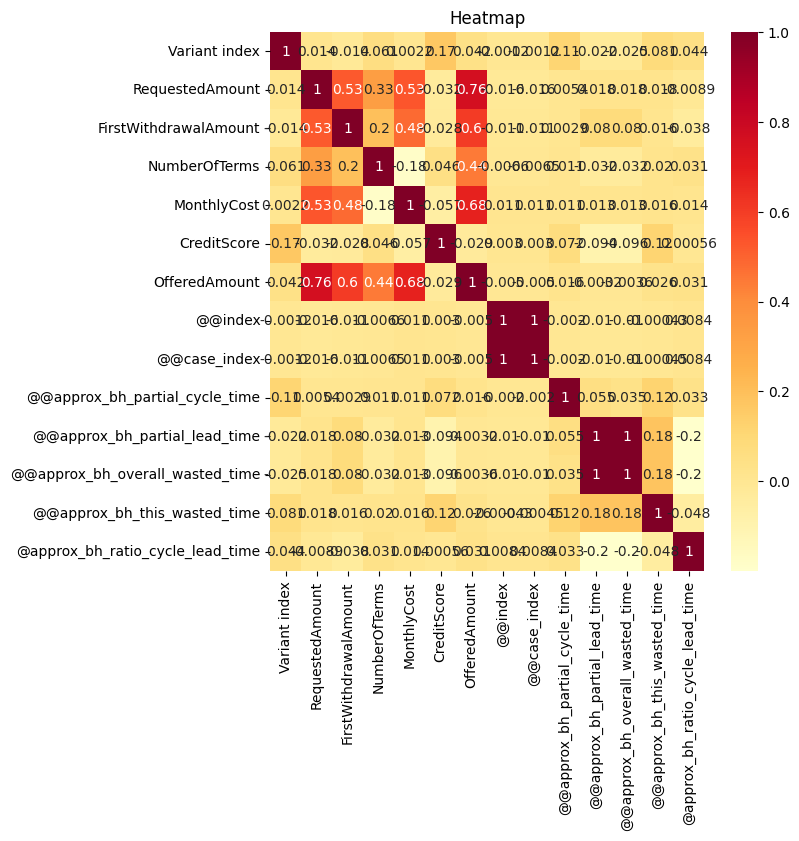

In [ ]:
# plotting heat map between numeric variables
fig, ax = plt.subplots(figsize=(7,7)) 
sns.heatmap(num_columns.corr(), annot=True, ax = ax, cmap='YlOrRd')
plt.title('Heatmap')

array([[<Axes: title={'center': 'Variant index'}>,
        <Axes: title={'center': 'RequestedAmount'}>,
        <Axes: title={'center': 'FirstWithdrawalAmount'}>,
        <Axes: title={'center': 'NumberOfTerms'}>],
       [<Axes: title={'center': 'MonthlyCost'}>,
        <Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'OfferedAmount'}>,
        <Axes: title={'center': '@@index'}>],
       [<Axes: title={'center': '@@case_index'}>,
        <Axes: title={'center': '@@approx_bh_partial_cycle_time'}>,
        <Axes: title={'center': '@@approx_bh_partial_lead_time'}>,
        <Axes: title={'center': '@@approx_bh_overall_wasted_time'}>],
       [<Axes: title={'center': '@@approx_bh_this_wasted_time'}>,
        <Axes: title={'center': '@approx_bh_ratio_cycle_lead_time'}>,
        <Axes: >, <Axes: >]], dtype=object)

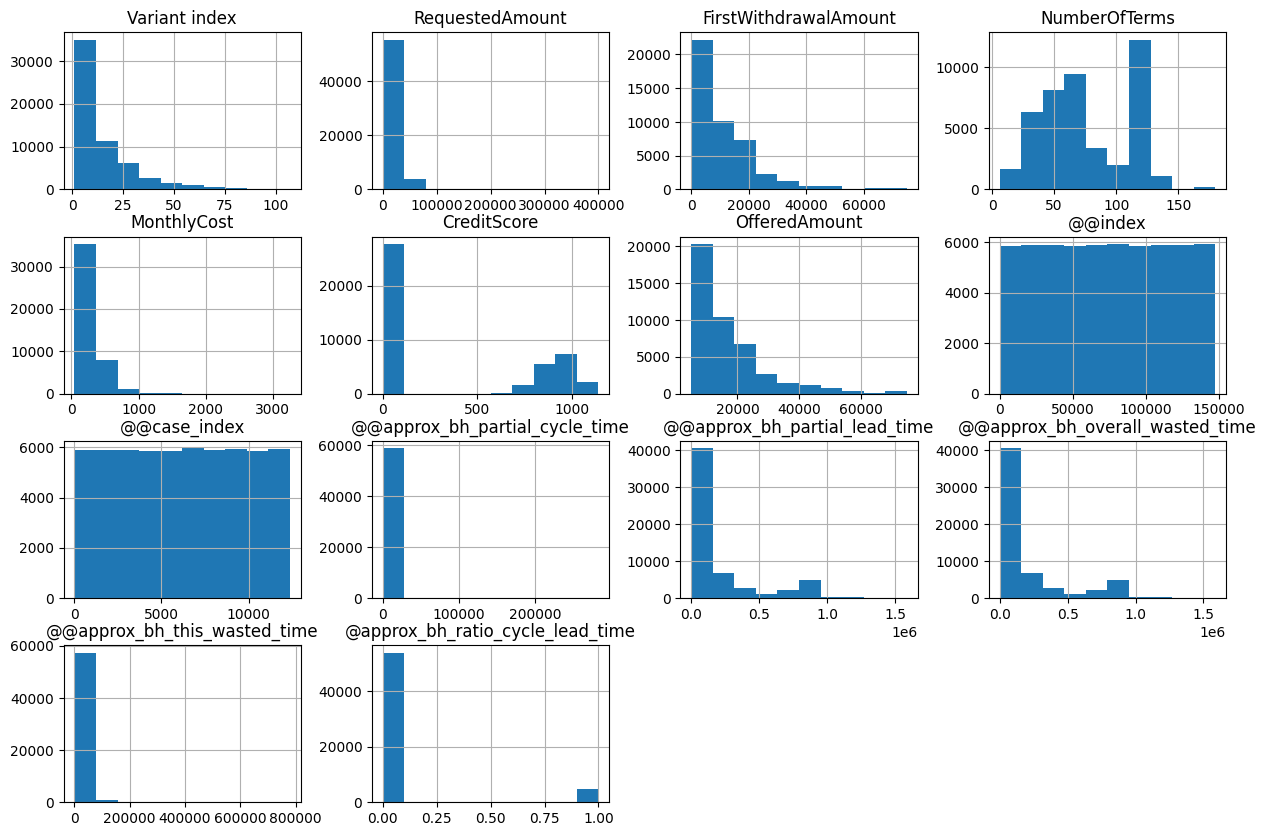

In [ ]:
num_columns.hist(figsize=(15,10))

In [ ]:
# !pip install -U scikit-learn
import sklearn as sk

In [ ]:
/////////////////////////////////////////////////////////////////////////////////

In [ ]:
df_concatenated = pd.concat([cat_columns, num_columns], axis=1)
df_concatenated = df_concatenated.dropna()
print(df_concatenated)

       Accepted Selected                LoanGoal ApplicationType  \
4          True    False  Other, see explanation      New credit   
5          True    False  Other, see explanation      New credit   
6          True    False  Other, see explanation      New credit   
9          True    False  Other, see explanation      New credit   
14         True     True        Home improvement      New credit   
...         ...      ...                     ...             ...   
147715     True     True        Caravan / Camper      New credit   
147716     True     True        Caravan / Camper      New credit   
147717     True     True        Caravan / Camper      New credit   
147720     True     True        Caravan / Camper      New credit   
147722     True     True        Caravan / Camper      New credit   

        Variant index  RequestedAmount  FirstWithdrawalAmount  NumberOfTerms  \
4                 2.0           5000.0                 5000.0           22.0   
5                 2.0  

In [ ]:
import numpy as np
y = df_concatenated['Selected']
y = np.array(y).astype(int)
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
#df_concatenated.drop["Accepted", "Selected"]
x = df_concatenated.drop(["Accepted", "Selected", "LoanGoal", "ApplicationType"], axis=1)
x

Variant index  RequestedAmount  FirstWithdrawalAmount  NumberOfTerms  \
4                 2.0           5000.0                 5000.0           22.0   
5                 2.0           5000.0                 5000.0           22.0   
6                 2.0           5000.0                 5000.0           22.0   
9                 2.0           5000.0                 5000.0           22.0   
14                5.0          12500.0                    0.0           57.0   
...               ...              ...                    ...            ...   
147715           10.0          30000.0                30000.0          102.0   
147716           10.0          30000.0                30000.0          102.0   
147717           10.0          30000.0                30000.0          102.0   
147720           10.0          30000.0                30000.0          102.0   
147722           10.0          30000.0                30000.0          102.0   

        MonthlyCost  CreditScore  OfferedAmount   @@index  @@case_index  \
4            241.28          0.0         5000.0       4.0           0.0   
5            241.28          0.0         5000.0       5.0           0.0   
6            241.28          0.0         5000.0       6.0           0.0   
9            241.28          0.0         5000.0       9.0           0.0   
14           250.00        929.0        12500.0      14.0           1.0   
...             ...          ...            ...       ...           ...   
147715       349.13        877.0        30000.0  147715.0       12379.0   
147716       349.13        877.0        30000.0  147716.0       12379.0   
147717       349.13        877.0        30000.0  147717.0       12379.0   
147720       349.13        877.0        30000.0  147720.0       12379.0   
147722       349.13        877.0        30000.0  147722.0       12379.0   

        @@approx_bh_partial_cycle_time  @@approx_bh_partial_lead_time  \
4                                  0.0                      68397.320   
5                                  0.0                      68398.162   
6                                  0.0                      68483.264   
9                                  0.0                     795636.829   
14                                 0.0                      64655.558   
...                                ...                            ...   
147715                             0.0                      67757.050   
147716                             0.0                      67757.737   
147717                             0.0                      67808.306   
147720                             0.0                     311467.388   
147722                             0.0                     404845.957   

        @@approx_bh_overall_wasted_time  @@approx_bh_this_wasted_time  \
4                             68397.320                       169.901   
5                             68398.162                         0.842   
6                             68483.264                        85.102   
9                            795636.829                         0.119   
14                            64655.558                       114.708   
...                                 ...                           ...   
147715                        67757.050                        86.206   
147716                        67757.737                         0.687   
147717                        67808.306                        50.569   
147720                       311467.388                         6.655   
147722                       404845.957                     85200.764   

        @approx_bh_ratio_cycle_lead_time  
4                                    0.0  
5                                    0.0  
6                                    0.0  
9                                    0.0  
14                                   0.0  
...                                  ...  
147715                               0.0  
147716                               0.0  
14771

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(x, y)
RandomForestClassifier(random_state=0)
clf.predict(x)

array([0, 0, 0, ..., 1, 1, 1])

In [2]:
count = 0
accur = []
for i in clf.predict(x):
    if i == y[count]:
        accur.append(1)
    else:
        accur.append(0)
    count += 1

NameError: name 'clf' is not defined

In [ ]:
from sklearn.model_selection import cross_validate
result = cross_validate(clf, x, y)  # defaults to 5-fold CV
#result['test_score']  # r_squared 
result

{'fit_time': array([15.81906414, 12.83640146, 12.79712677, 13.53634882, 12.72603655]),
 'score_time': array([0.29301667, 0.13117409, 0.13167024, 0.13192844, 0.13275003]),
 'test_score': array([0.96119336, 0.97936063, 0.97767807, 0.97487381, 0.96590017])}